<a href="https://colab.research.google.com/github/Venkatakkinapalli/School-of-AI/blob/master/Mid_Term_DataLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import File from Local

In [189]:
'''
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))'
      
      '''

'\nfrom google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))\'\n      \n      '

# Lets Load the file to a Data Frame

In [0]:
df = pd.read_csv("AAPL.csv")

In [191]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-06,153.899994,155.809998,153.779999,154.449997,149.805511,26624900
1,2017-06-07,155.020004,155.979996,154.479996,155.369995,150.697861,21069600
2,2017-06-08,155.250000,155.539993,154.399994,154.990005,150.329269,21250800
3,2017-06-09,155.190002,155.190002,146.020004,148.979996,144.500000,64882700
4,2017-06-12,145.740005,146.089996,142.509995,145.419998,141.047043,72307300


In [0]:
df = df.drop(labels='Adj Close', axis= 1)

In [0]:
df['Date'] = pd.to_datetime(df.Date)
df.loc[:,'LogVolume'] = np.log(df.Volume.values)

Round the columns to two digits

In [194]:
df = df.round({'Open':2,'High':2,'Low':2, 'Close':2,'LogVolume':2})
df.head()

,Date,Open,High,Low,Close,Volume,LogVolume
0,2017-06-06,153.90,155.81,153.78,154.45,26624900,17.10
1,2017-06-07,155.02,155.98,154.48,155.37,21069600,16.86
2,2017-06-08,155.25,155.54,154.40,154.99,21250800,16.87
3,2017-06-09,155.19,155.19,146.02,148.98,64882700,17.99
4,2017-06-12,145.74,146.09,142.51,145.42,72307300,18.10


In [0]:
df.loc[:,'OneDbefore'] = df.Close.shift(1)
df.loc[:,'FiveDbefore'] = df.Close.shift(5)

In [0]:
df = df.dropna()

In [0]:
df.loc[:,'Open_diff'] = df.Open.values - df.OneDbefore.values
df.loc[:,'High_diff'] = df.High.values - df.OneDbefore.values
df.loc[:,'Low_diff'] = df.Low.values - df.OneDbefore.values
df.loc[:,'Change'] = df.Close.values - df.OneDbefore.values
df.loc[:,'logDate'] = np.log(pd.to_numeric(df.Date))

In [0]:
a = df.loc[:,'logDate']

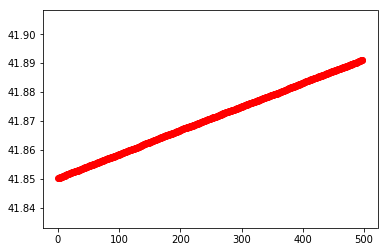

In [199]:
plt.scatter(np.arange(len(a)),a,c = 'R')

In [0]:
df = df.reset_index().drop(labels = ['Date','index','Volume'], axis = 1)

In [201]:
df.corr()

,Open,High,Low,Close,LogVolume,OneDbefore,FiveDbefore,Open_diff,High_diff,Low_diff,Change,logDate
Open,1.000000,0.997902,0.997057,0.994892,0.015095,0.995852,0.958510,-0.000468,0.098994,-0.107745,-0.023813,0.536255
High,0.997902,1.000000,0.996698,0.997482,0.036244,0.994119,0.959662,-0.004385,0.134226,-0.096480,0.006978,0.545488
Low,0.997057,0.996698,1.000000,0.997674,-0.021213,0.992495,0.951647,0.004218,0.118606,-0.056655,0.019921,0.527823
Close,0.994892,0.997482,0.997674,1.000000,0.003991,0.990148,0.953012,0.006323,0.147327,-0.056202,0.053213,0.537471
LogVolume,0.015095,0.036244,-0.021213,0.003991,1.000000,0.021266,0.078166,-0.068522,0.139973,-0.344328,-0.123263,0.165236
OneDbefore,0.995852,0.994119,0.992495,0.990148,0.021266,1.000000,0.962409,-0.091449,0.026124,-0.178315,-0.087141,0.540894
FiveDbefore,0.958510,0.959662,0.951647,0.953012,0.078166,0.962409,1.000000,-0.086998,0.052035,-0.200092,-0.083256,0.555260
Open_diff,-0.000468,-0.004385,0.004218,0.006323,-0.068522,-0.091449,-0.086998,1.000000,0.796353,0.780599,0.697134,-0.075684
High_diff,0.098994,0.134226,0.118606,0.147327,0.139973,0.026124,0.052035,0.796353,1.000000,0.741098,0.861818,0.085900
Low_diff,-0.107745,-0.096480,-0.056655,-0.056202,-0.344328,-0.178315,-0.200092,0.780599,0.741098,1.000000,0.871786,-0.168966


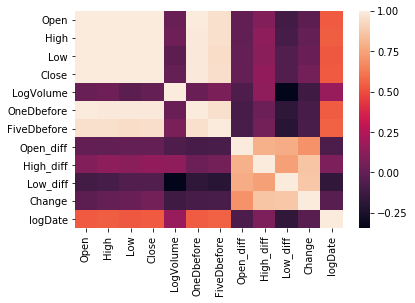

In [202]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
X = df.drop(labels=['Close','Change'],axis = 1)
y = df['Close']

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
def print_errors(y_hat,y_test):
  print('r2_score :',r2_score(y_hat,y_test),' mae: ',mean_absolute_error(y_hat,y_test),' mse :'
      ,mean_squared_error(y_hat,y_test))

In [206]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr_hat = lr.predict(X_test)
print_errors(y_lr_hat,y_test)

r2_score : 0.9975625902910076  mae:  0.7253772999939383  mse : 0.9730012657427933


In [207]:
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.88876e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40962e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.53769e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.22411e-17): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [208]:
y_rd_hat = ridge_regressor.predict(X_test)
print_errors(y_rd_hat,y_test)

r2_score : 0.9975747174789582  mae:  0.7252515414489216  mse : 0.968044856972247


In [209]:
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.23069491711854, tolerance: 14.44800839836478
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.48883098231542, tolerance: 15.653231535235111
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.022362416103704, tolerance: 14.974305350471703
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.614942472

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [210]:
y_ls_hat = lasso_regressor.predict(X_test)
print_errors(y_ls_hat,y_test)

r2_score : 0.9976062992017488  mae:  0.726727037741072  mse : 0.9550574516453838


In [211]:

print(np.c_[X_test.columns,lasso_regressor.best_estimator_.coef_])

[['Open' 0.9785506283268105]
 ['High' 0.014275196430752563]
 ['Low' 0.008894239877764271]
 ['LogVolume' 0.0]
 ['OneDbefore' -0.003670978329060439]
 ['FiveDbefore' -0.002175985726718849]
 ['Open_diff' -1.4260811044603678]
 ['High_diff' 0.7611548617973044]
 ['Low_diff' 0.7272695776694043]
 ['logDate' 0.0]]


In [0]:
#np.arange(X_train.shape[0],X_train.shape[0]+X_test.shape[0])

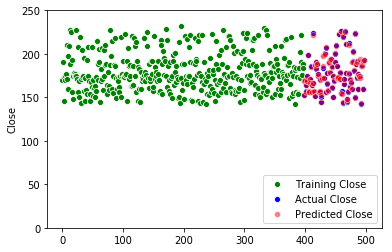

In [213]:
ax = sns.scatterplot(x = np.arange(len(X_train)), y=y_train, color='g', label='Training Close')
sns.scatterplot(x=np.arange(X_train.shape[0],X_train.shape[0]+X_test.shape[0]), y=y_test, color='b', label='Actual Close')
sns.scatterplot(x=np.arange(X_train.shape[0],X_train.shape[0]+X_test.shape[0]), y=y_ls_hat, color='r', label='Predicted Close', alpha=0.5)
#sns.lineplot(x=x_test.day, y=test_pred, color='r', label='Predicted Close', alpha=0.5)
ax.set_ylim(0,250)
ax.legend(loc='lower right')

In [0]:
print(np.c_[X_test.Open,y_ls_hat,y_test])